# Part 1: Data Cleaning and Exploratory Data Analysis

This workbook is 1 out of 3 parts of a prediction model to determine the occurrence of West Nile Virus. The focus of this part is to perform data cleaning and exploratory data analysis on the four datasets provided on Kaggle.

In [83]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [84]:
# Read all csv files
train_df = pd.read_csv('../datasets/train.csv')
weather_df = pd.read_csv('../datasets/weather.csv')
spray_df = pd.read_csv('../datasets/spray.csv')
test_df = pd.read_csv('../datasets/test.csv')

## Background information

##### Kaggle competition link
The full competition can be found in the link below, and we are using the dataset contained there for our data science project.
https://www.kaggle.com/competitions/predict-west-nile-virus/overview

#### What is West Nile Virus?
West Nile virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. There are currently no vaccines to prevent or medications to treat WNV in people. Fortunately, most people infected with WNV do not feel sick. 

#### Who are we?
As data scientists working at Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE), due to the recent epidemic of WNV in the Windy City, we've had the Department of Public Health set up a surveillance and control system. Our task is to predict occurences of the WNV using the dataset provided by the Chicago Department of Public Health (CDPH), and to evaluate the cost and benefit of spraying.

#### Why is it important?
Around 20% of people who become infected with WNV develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. Around 1 to 5% of infected people end up dying. As this is not a small number, the problem warrants attention from the authorities. 

#### Facts we found
1) Contrary to popular belief, the West Nile Virus doesn't hop between humans, and is only transmited when specific mosquito species bite an infected bird and then a human. The most common vectors of WNV are crows and jays. As such, humans are a dead end host. [*source*](https://www.hopkinsmedicine.org/health/conditions-and-diseases/west-nile-virus)

2) The period of greatest concern is around summer through fall. Specifically June to November where WNV can spread rampantly.[*source*](https://www.cdc.gov/westnile/index.html#:~:text=West%20Nile%20virus%20(WNV)%20is,summer%20and%20continues%20through%20fall).

# Data Cleaning

## Test dataset

In [3]:
test_df.shape

(116293, 11)

In [46]:
test_df.head()

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

## Train dataset

### To add year month and day to train dataset

In [3]:
train_df.shape

(10506, 12)

In [4]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [5]:
# Add new columns for day, month and year - weekday
# day
train_df['Day'] = train_df['Date'].dt.day
# month
train_df['Month'] = train_df['Date'].dt.month
# year
train_df['Year'] = train_df['Date'].dt.year

### Creating new dataframes for 2011 and 2013 to explore spray dataset with

In [6]:
train_2011 = train_df[train_df['Year']==2011]

In [7]:
train_2011_wnv = train_df[(train_df['WnvPresent']== 1) & (train_df['Year']==2011)]

In [8]:
train_2013 = train_df[train_df['Year']==2013]

In [9]:
train_2013_wnv = train_df[(train_df['WnvPresent']== 1) & (train_df['Year']==2013)]

## Exploring of train dataset

In [28]:
train_df.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  Day  Month  Year  
0             1           0   29      5  2007  
1             1           0   29      5  2007  
2             1           0   29      5  2007  
3             1           0   29      5  2007  
4             4           0   29      5  2007

In [29]:
train_df.describe()

Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690    -87.627796         9.000000   
max       98.000000     42.017430    -87.531635         9.000000   

       NumMosquitos    WnvPresent           Day         Month          Year  
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000  
mean      12.853512      0.052446     15.341424      7.692557   2009.576242  
std       16.133816      0.222936      8.901205      1.067675      2.354645  
min        1.000000      0.000000      1.000000      5.000000   2007.000000  
25%        2.000000      0.000000      7.000000      7.000000   2007.000000  
50%        5.000000      0.000000     15.000000      8.000000   2009.000000  
75%       17.000000      0.000000     24.000000      8.000000   2011.000000  
max       50.000000      1.000000     31.000000     10.000000   2013.000000

Noted that the minimum number of mosquitos is 1, and never 0. However, the highest it can go up to is 50

In [10]:
train_df.sort_values(by=['NumMosquitos'], ascending=True).head()

Date                                            Address  \
0     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4730  2009-07-17     2500 West Grand Avenue, Chicago, IL 60654, USA   
4731  2009-07-17     2500 West Grand Avenue, Chicago, IL 60654, USA   
4734  2009-07-17   1100 West Chicago Avenue, Chicago, IL 60642, USA   
4741  2009-07-17    2200 North Cannon Drive, Chicago, IL 60614, USA   

                     Species  Block           Street  Trap  \
0     CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
4730           CULEX PIPIENS     25      W GRAND AVE  T046   
4731        CULEX SALINARIUS     25      W GRAND AVE  T046   
4734  CULEX PIPIENS/RESTUANS     11        W CHICAGO  T049   
4741        CULEX SALINARIUS     22      N CANNON DR  T054   

                 AddressNumberAndStreet   Latitude  Longitude  \
0     4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
4730     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   
4731     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   
4734       1100  W CHICAGO, Chicago, IL  41.896282 -87.655232   
4741     2200  N CANNON DR, Chicago, IL  41.921965 -87.632085   

      AddressAccuracy  NumMosquitos  WnvPresent  
0                   9             1           0  
4730                8             1           0  
4731                8             1           0  
4734                8             1           0  
4741                8             1           0

In [11]:
train_df.sort_values(by=['NumMosquitos'], ascending=True).tail()

Date                                            Address  \
1707  2007-08-08        South Stony Island Avenue, Chicago, IL, USA   
1706  2007-08-08        South Stony Island Avenue, Chicago, IL, USA   
4197  2009-06-19  8900 South Carpenter Street, Chicago, IL 60620...   
4086  2009-06-12  5000 South Central Avenue, Chicago, IL 60638, USA   
7073  2011-07-29  1300 North Laramie Avenue, Chicago, IL 60651, USA   

                     Species  Block               Street  Trap  \
1707           CULEX PIPIENS     10   S STONY ISLAND AVE  T138   
1706           CULEX PIPIENS     10   S STONY ISLAND AVE  T138   
4197  CULEX PIPIENS/RESTUANS     89       S CARPENTER ST  T159   
4086          CULEX RESTUANS     50        S CENTRAL AVE  T031   
7073  CULEX PIPIENS/RESTUANS     13        N LARAMIE AVE  T230   

                     AddressNumberAndStreet   Latitude  Longitude  \
1707  1000  S STONY ISLAND AVE, Chicago, IL  41.726465 -87.585413   
1706  1000  S STONY ISLAND AVE, Chicago, IL  41.726465 -87.585413   
4197      8900  S CARPENTER ST, Chicago, IL  41.732984 -87.649642   
4086       5000  S CENTRAL AVE, Chicago, IL  41.801498 -87.763416   
7073       1300  N LARAMIE AVE, Chicago, IL  41.904194 -87.756155   

      AddressAccuracy  NumMosquitos  WnvPresent  
1707                5            50           0  
1706                5            50           0  
4197                8            50           0  
4086                9            50           0  
7073                9            50           0

Looks like there is duplicates, same trap number, same date, with same latitude and longitude

It was interesting to note that even though these 5 are the largest number of mosquitos, there was still no West Nile Virus amongst them.

In [30]:
train_df.groupby('WnvPresent').mean()

Block   Latitude  Longitude  AddressAccuracy  NumMosquitos  \
WnvPresent                                                                   
0           35.659869  41.840378 -87.698538         7.816775     12.106479   
1           36.192377  41.854891 -87.724663         7.869328     26.350272   

                  Day     Month         Year  
WnvPresent                                    
0           15.324159  7.667403  2009.548066  
1           15.653358  8.147005  2010.085299

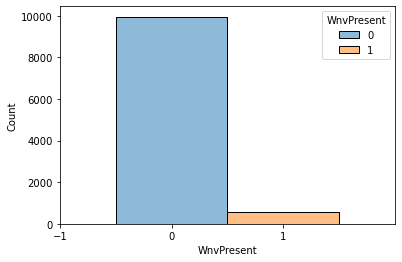

In [74]:
plt.xlim([-1, 2])
plt.xticks(np.arange(-1, 2))
sns.histplot(train_df, x='WnvPresent', discrete=True, hue='WnvPresent');


#### Exploration of null values

In [32]:
train_df.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Day                       0
Month                     0
Year                      0
dtype: int64

We noted there were no values that were null, and therefore all datapoints are complete, requiring no additional cleaning for purpose of null values.

## Explore why area has large number of mosquitos

What if I sort the number of mosquitos ascending and descending? Why are some areas without 

## Exploring of weather dataset

In [3]:
weather_df.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [4]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [6]:
# Check for null values
weather_df.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

We noted that there were no null values. However on closer inspection of the data, the data contains 'M' and 'T' meaning missing and trace.

### Exploring of spray dataset

In [10]:
spray_df.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [11]:
spray_df['Date']=pd.to_datetime(spray_df['Date'])  #DATA CLEANING

In [12]:
#DATA CLEANING

# Add new columns for day, month and year - weekday
# day
spray_df['Day'] = spray_df['Date'].dt.day
# month
spray_df['Month'] = spray_df['Date'].dt.month
# year
spray_df['Year'] = spray_df['Date'].dt.year

In [6]:
spray_df.describe()

Latitude     Longitude           Day         Month          Year
count  14835.000000  14835.000000  14835.000000  14835.000000  14835.000000
mean      41.904828    -87.736690     17.073812      7.948028   2012.702191
std        0.104381      0.067292      7.959018      0.677402      0.712013
min       41.713925    -88.096468      5.000000      7.000000   2011.000000
25%       41.785001    -87.794225      8.000000      7.000000   2013.000000
50%       41.940075    -87.727853     17.000000      8.000000   2013.000000
75%       41.980978    -87.694108     25.000000      8.000000   2013.000000
max       42.395983    -87.586727     29.000000      9.000000   2013.000000

Seen from the minimum values and maximum values for month, sprays data is provided between July to September. 

Similarly from the minimum and maximum values for years, we observe that data is provided between the years 2011 to 2013.

In [11]:
# Check for null values #DATA CLEANING
spray_df.isnull().sum() 

Date           0
Time         584
Latitude       0
Longitude      0
Day            0
Month          0
Year           0
dtype: int64

We observed that there are a total of 584 null values, which is around 4% of total spray data. We will observe below if there are ways we may be able to deductively impute the missing data.

In [9]:
# Check if there are patterns for time #DATA CLEANING
spray_df['Time'].value_counts()

7:44:32 PM    541
8:57:46 PM      5
9:31:27 PM      5
9:35:47 PM      5
9:37:27 PM      5
             ... 
9:39:58 PM      1
9:39:48 PM      1
9:39:38 PM      1
9:39:28 PM      1
8:04:21 PM      1
Name: Time, Length: 8583, dtype: int64

Based on the value counts above, we observe that the most observations of sprays happened at 7:44:32PM.

Even though a large number of 541 observations happened at that timing,  it smaller than the 584 observations with missing values, making the deductive imputation a weak one. As such, we decide to drop time as a feature as we are unable to have a strong deductive imputation.

In [33]:
spray_df[spray_df['Time'].isnull()]  #DATA CLEANING

Date Time   Latitude  Longitude  Day  Month  Year
1030 2011-09-07  NaT  41.987092 -87.794286    7      9  2011
1031 2011-09-07  NaT  41.987620 -87.794382    7      9  2011
1032 2011-09-07  NaT  41.988004 -87.794574    7      9  2011
1033 2011-09-07  NaT  41.988292 -87.795486    7      9  2011
1034 2011-09-07  NaT  41.988100 -87.796014    7      9  2011
...         ...  ...        ...        ...  ...    ...   ...
1609 2011-09-07  NaT  41.995876 -87.811615    7      9  2011
1610 2011-09-07  NaT  41.995972 -87.810271    7      9  2011
1611 2011-09-07  NaT  41.995684 -87.810319    7      9  2011
1612 2011-09-07  NaT  41.994724 -87.810415    7      9  2011
1613 2011-09-07  NaT  41.993092 -87.810415    7      9  2011

[584 rows x 7 columns]

## Splitting spray data into 2 years, 2011 and 2013

In [17]:
# To remove outliers spotted above latitude 42.3   #DATA CLEANING
spray_2011 = spray_df[(spray_df['Year']==2011) & (spray_df['Latitude']<42.3)]

In [15]:
spray_2011   #DATA CLEANING

Date        Time   Latitude  Longitude  Day  Month  Year
95   2011-09-07  7:52:52 PM  41.981433 -87.787777    7      9  2011
96   2011-09-07  7:53:02 PM  41.980998 -87.787778    7      9  2011
97   2011-09-07  7:53:12 PM  41.980560 -87.787762    7      9  2011
98   2011-09-07  7:53:22 PM  41.980198 -87.787758    7      9  2011
99   2011-09-07  7:53:32 PM  41.979752 -87.787765    7      9  2011
...         ...         ...        ...        ...  ...    ...   ...
2204 2011-09-07  9:40:30 PM  41.990155 -87.817828    7      9  2011
2205 2011-09-07  9:40:40 PM  41.989638 -87.817857    7      9  2011
2206 2011-09-07  9:40:50 PM  41.989088 -87.817867    7      9  2011
2207 2011-09-07  9:41:00 PM  41.988812 -87.817618    7      9  2011
2208 2011-09-07  9:41:10 PM  41.988837 -87.817002    7      9  2011

[2114 rows x 7 columns]

In [27]:
spray_2011.describe()   #DATA CLEANING

Latitude    Longitude     Day   Month    Year
count  2114.000000  2114.000000  2114.0  2114.0  2114.0
mean     41.983344   -87.805927     7.0     9.0  2011.0
std       0.006702     0.012738     0.0     0.0     0.0
min      41.968435   -87.836560     7.0     9.0  2011.0
25%      41.977943   -87.816806     7.0     9.0  2011.0
50%      41.985556   -87.803253     7.0     9.0  2011.0
75%      41.986460   -87.794225     7.0     9.0  2011.0
max      41.997028   -87.787710     7.0     9.0  2011.0

In [28]:
spray_2013.describe()    #DATA CLEANING

Latitude     Longitude           Day         Month     Year
count  12626.000000  12626.000000  12626.000000  12626.000000  12626.0
mean      41.888014    -87.722413     18.670759      7.771503   2013.0
std        0.098442      0.057701      7.335957      0.568046      0.0
min       41.713925    -87.871023      5.000000      7.000000   2013.0
25%       41.776598    -87.772391     15.000000      7.000000   2013.0
50%       41.927467    -87.718459     17.000000      8.000000   2013.0
75%       41.958267    -87.685244     25.000000      8.000000   2013.0
max       42.018907    -87.586727     29.000000      9.000000   2013.0

In [19]:
# Check that outlier has been removed   #DATA CLEANING
spray_2011[spray_2011["Latitude"]>42.3]

Empty DataFrame
Columns: [Date, Time, Latitude, Longitude, Day, Month, Year]
Index: []

In several iterations of exploration of data, we noted that there was a location outlier in spray. As the spray was a large distance away from the mosquito traps and away from the area of concern, we decided to remove them.

In [20]:
spray_2013 = spray_df[spray_df['Year']==2013]   #DATA CLEANING

In [21]:
spray_2013    #DATA CLEANING

Date        Time   Latitude  Longitude  Day  Month  Year
2209  2013-07-17  7:45:45 PM  41.997728 -87.767532   17      7  2013
2210  2013-07-17  7:45:55 PM  41.997990 -87.768085   17      7  2013
2211  2013-07-17  7:46:05 PM  41.998237 -87.768623   17      7  2013
2212  2013-07-17  7:46:15 PM  41.998510 -87.769225   17      7  2013
2213  2013-07-17  7:46:25 PM  41.998793 -87.769833   17      7  2013
...          ...         ...        ...        ...  ...    ...   ...
14830 2013-09-05  8:34:11 PM  42.006587 -87.812355    5      9  2013
14831 2013-09-05  8:35:01 PM  42.006192 -87.816015    5      9  2013
14832 2013-09-05  8:35:21 PM  42.006022 -87.817392    5      9  2013
14833 2013-09-05  8:35:31 PM  42.005453 -87.817423    5      9  2013
14834 2013-09-05  8:35:41 PM  42.004805 -87.817460    5      9  2013

[12626 rows x 7 columns]

# Exploratory Data Analysis

### Explore if spraying is a lagging or leading indicator of WNV outbreaks

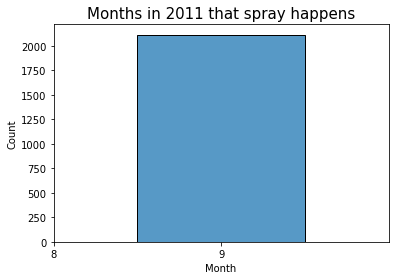

In [74]:
plt.xlim([8, 10])
plt.xticks(np.arange(8, 10))
sns.histplot(spray_2011, x='Month', discrete=True)
plt.title('Months in 2011 that spray happens', fontsize=15);

Noted that sprays for 2011 all happen in just 1 month alone in 2011.

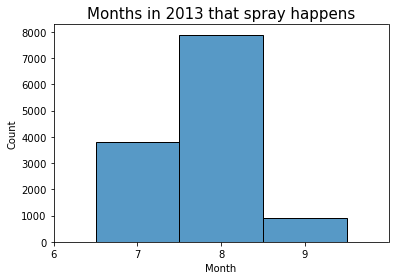

In [79]:
plt.xlim([6,10])
plt.xticks(np.arange(6, 10))
sns.histplot(spray_2013, x='Month', discrete=True)
plt.title('Months in 2013 that spray happens', fontsize=15);

Noted that sprays for 2013 all happen in across 3 months in 2013. Also noted that the bulk of spraying efforts was in the month of August. The spraying efforts in 2013 are also significantly higher compared to 2011. In 2011, it was around 2000 sprays in September, but in 2013, the number of spray in July was already double it at 4,000, and then 8,000 in August, before tapering down in September at 1,000.

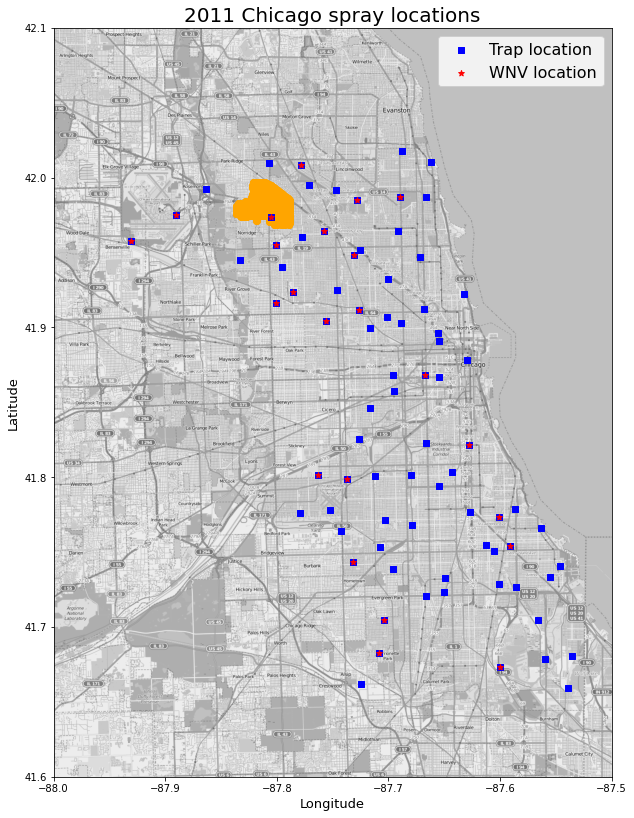

In [55]:
# Import map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

# After outlier removed
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


# Plot spray locations
spray_locations_2011 = spray_2011[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(spray_locations_2011[:,0], spray_locations_2011[:,1], marker='o', color='Orange')

# Plot trap locations
trap_locations_2011 = train_2011[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations_2011[:,0], trap_locations_2011[:,1], marker='s', color='Blue', label='Trap location');

# PLot WNV locations
wnv_locations_2011 = train_2011_wnv[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations_2011[:,0], wnv_locations_2011[:,1], marker='*', color='Red', label='WNV location');

plt.title('2011 Chicago spray locations', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

Spraying in 2011 was very concentrated in specific region in the north of Chicago.

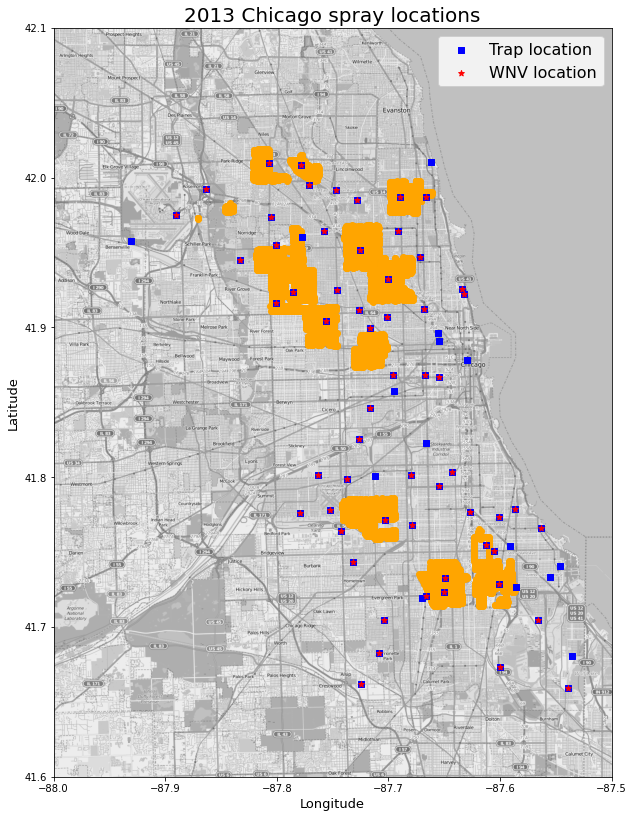

In [95]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1) 

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# Plot spray locations
spray_locations_2013 = spray_2013[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(spray_locations_2013[:,0], spray_locations_2013[:,1], marker='o', color='Orange');

# Plot trap locations
trap_locations_2013 = train_2013[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations_2013[:,0], trap_locations_2013[:,1], marker='s', color='Blue', label='Trap location');

# PLot WNV locations
wnv_locations_2013 = train_2013_wnv[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations_2013[:,0], wnv_locations_2013[:,1], marker='*', color='Red', label='WNV location')

plt.title('2013 Chicago spray locations', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

Similar location and broadened in 2013, for sprays. However WNV also seems to have spreaded. There is also a lack of overlap for spray regions over all WNV outbreak regions. This might be a sign of indiscriminate spraying practice. We will look at spray concentration across 2011 and 2013 to see if it gives us any further insights. 

## Spray concentration in 2011 and 2013

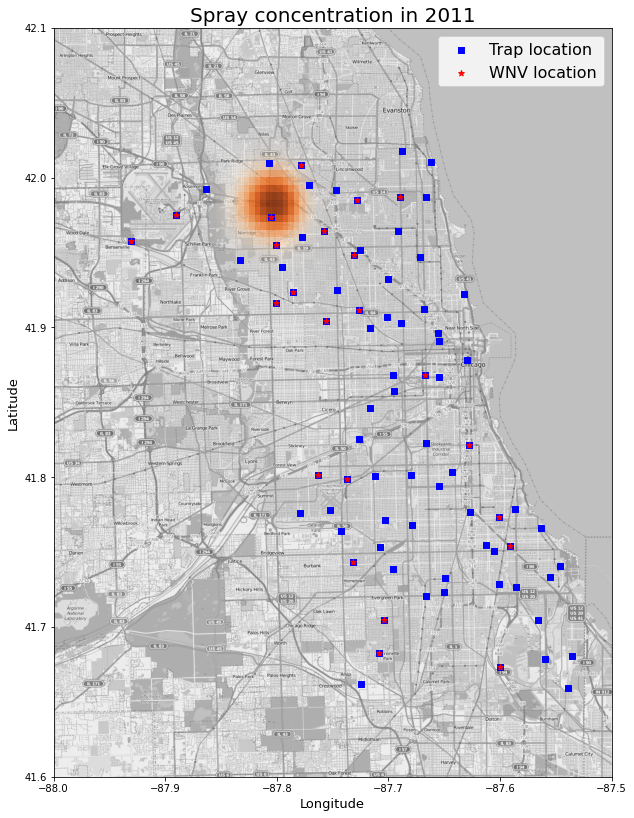

In [87]:
# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Location of sprays

X = spray_2011[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
trap_locations_2011 = train_2011[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations_2011[:,0], trap_locations_2011[:,1], marker='s', color='Blue', label='Trap location');

# PLot WNV locations
wnv_locations_2011 = train_2011_wnv[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations_2011[:,0], wnv_locations_2011[:,1], marker='*', color='Red', label='WNV location');


plt.title('Spray concentration in 2011', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

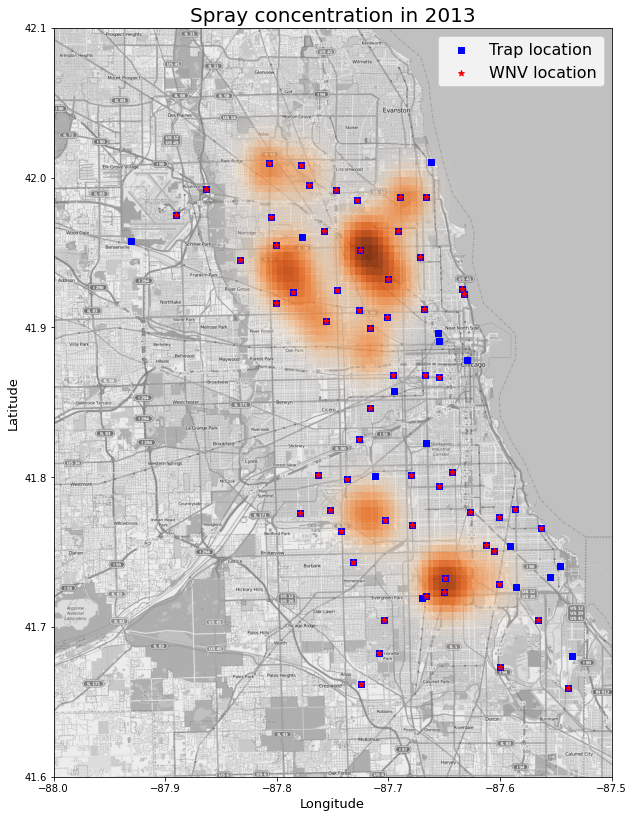

In [89]:
# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Location of sprays

X = spray_2013[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
trap_locations_2013 = train_2013[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations_2013[:,0], trap_locations_2013[:,1], marker='s', color='Blue', label='Trap location');

# PLot WNV locations
wnv_locations_2013 = train_2013_wnv[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations_2013[:,0], wnv_locations_2013[:,1], marker='*', color='Red', label='WNV location')

plt.title('Spray concentration in 2013', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

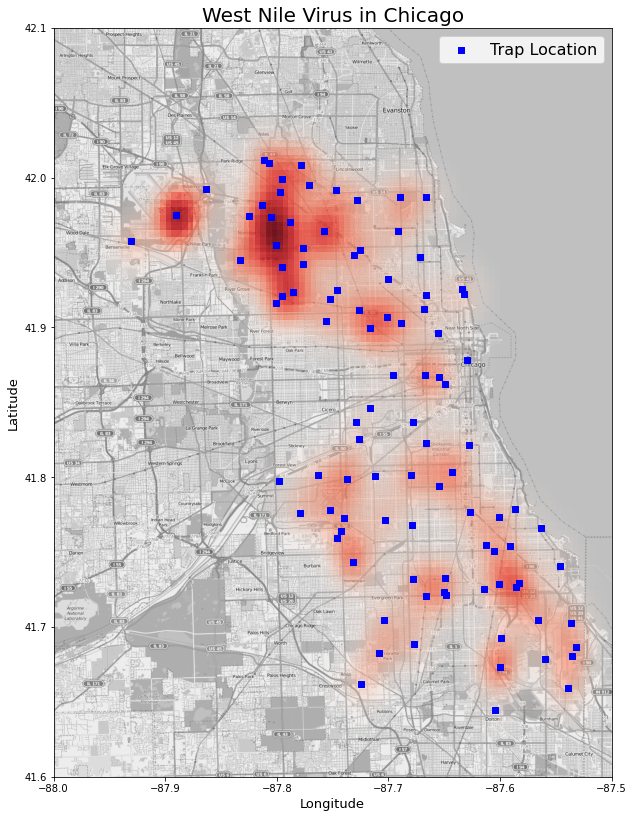

In [36]:
# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = train_df[train_df['WnvPresent'] == 1]
sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')


plt.title('West Nile Virus in Chicago (2007 to 2013)', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

We can see that the sprays are targeted in the densest parts where the West Nile virus outbreaks have happened over the years.

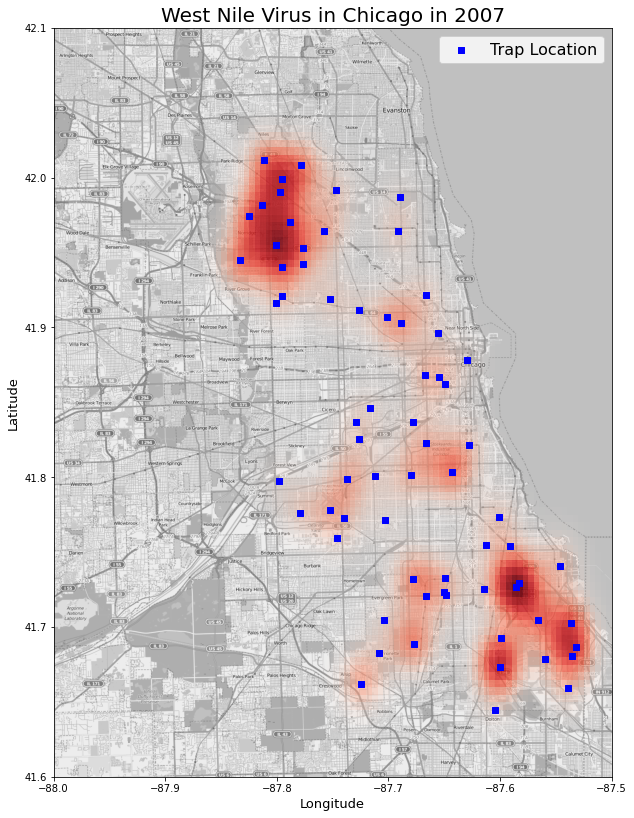

In [51]:
# To investigate 2007 visually has lower density in the hotspot areas after spraying

# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = train_df[(train_df['WnvPresent'] == 1) & (train_df['Year'] == 2007)]
sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')


plt.title('West Nile Virus in Chicago in 2007', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

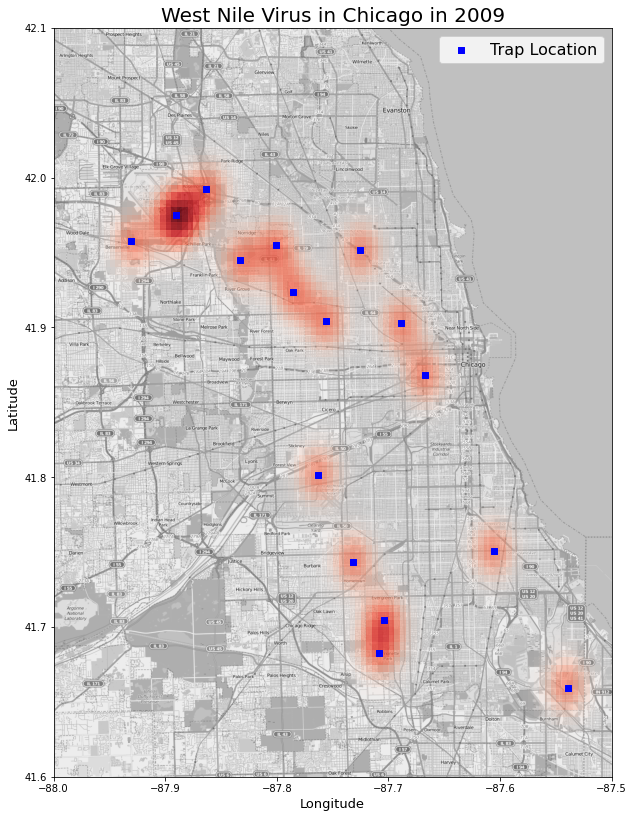

In [52]:
# To investigate 2009 visually has lower density in the hotspot areas after spraying

# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = train_df[(train_df['WnvPresent'] == 1) & (train_df['Year'] == 2009)]
sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')


plt.title('West Nile Virus in Chicago in 2009', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

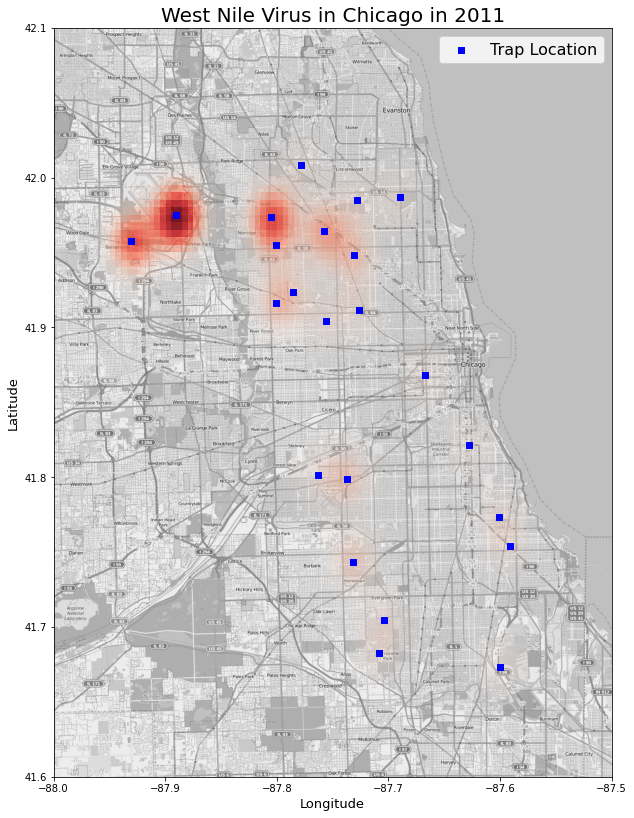

In [40]:
# To investigate 2011 has lower density in the hotspot areas after spraying

# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = train_df[(train_df['WnvPresent'] == 1) & (train_df['Year'] == 2011)]
sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')


plt.title('West Nile Virus in Chicago in 2011', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

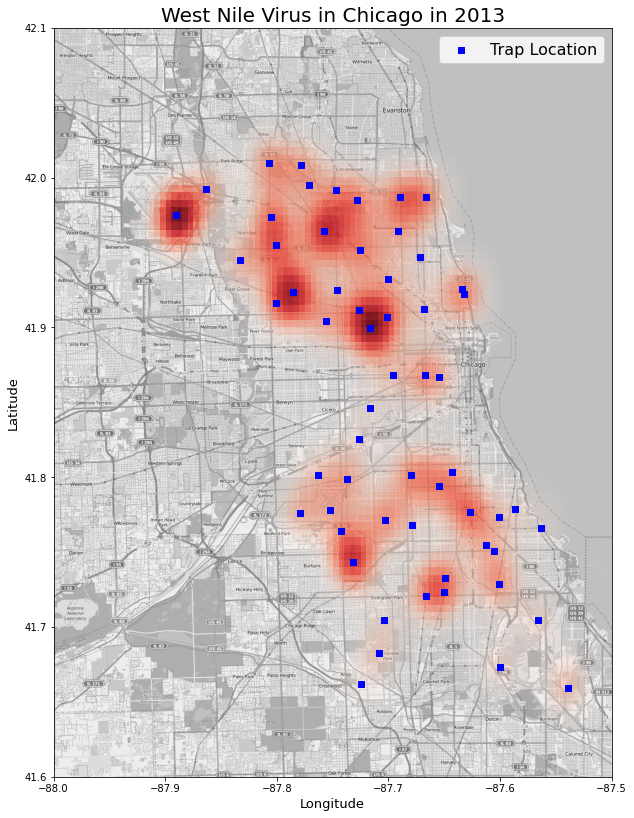

In [42]:
# To investigate if 2013 has lower density in the hotspot areas after spraying

# To investigate location density of West Nile Virus
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = train_df[(train_df['WnvPresent'] == 1) & (train_df['Year'] == 2013)]
sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='s', color='Blue', label='Trap Location')


plt.title('West Nile Virus in Chicago in 2013', fontsize=20)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend(fontsize=16);

Across the years, we see that there are several hotspots where WNV is present. There seems to be a reason why 2011 did not spray in the southern region compared to 2013.

## Spray data evaluation

From the graphs, it seems like sprays are a lagging indicator of WNV.

Furthermore, test data only has years 2008, 2010, 2012 and 2014 data, whereas spray dataset has years 2011 and 2013. In the absence of a spray column on test data, spray dataset cannot be used to predict the occurence of WNV.

We will instead use spray dataset to do the cost benefit analysis.